# Shor's Algorithm

* [Overview](#overview) 
* [Shor's  algorithm](#ekf)
    * [The quantum part](#sub_sec_1)
* [References](#refs)

## <a name="overview"></a> Overview

Shor's algorithm is a polynomial-time quantum algorithm for integer factorization [1]. Informally, it solves the following problem: Given an integer $N$, find its prime factors. Strictly speaking the quantum part of the algorithm solves the problem of period finding [3]. It was invented in 1994 by the American mathematician Peter Shor [1]. The following videos give a detailed exposure to Shor's algorithm.

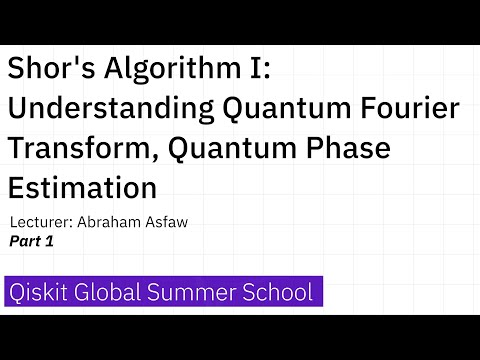

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('mAHC1dWKNYE', width=800, height=300)

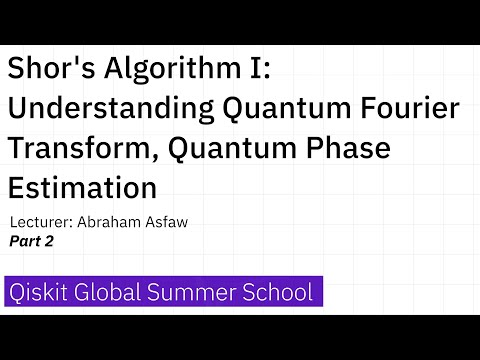

In [2]:
YouTubeVideo('pq2jkfJlLmY', width=800, height=300)

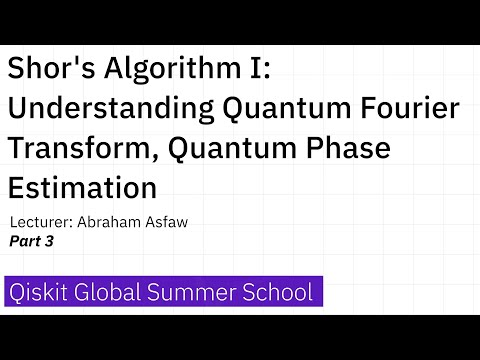

In [3]:
YouTubeVideo('5kcoaanYyZw', width=800, height=300)

## <a name="ekf"></a>  Shor's algorithm

Shor’s algorithm is based on the following fact: the factoring problem can be
reduced to finding the period of a certain function [2]. That is we need to find the smallest $r$ such that [2]

$$f_{\alpha, N}(r) = \alpha^r \text{Mod} N = 1 $$

Since the factoring problem can be turned into a period finding problem in polynomial time, having a period finding algorithm means it can be used to factor integers.

---
**Remark**

According to number theory, for any co-prime $\alpha \leq N$ the function $f_{\alpha, N}(r)$ will give a 1 for some $r<N$. When this happens, the sequence of number will repeat [2].

---

Let's assume for a moment that we know the period $r$ how this can help us to find the factors? To start with number theory tells us that  for the majority of $\alpha$ the period of $f_{\alpha, N}$ will be an even number [2]. Once we have an even $r$ so that

$$\alpha^r = 1 ~ \text{MOD}~N$$

which by subtracting 1 from both sides leads to [2]

$$\alpha^r -1 = 0 ~ \text{MOD}~N$$

or

$$ N |(\alpha^r -1)$$

which can be written as

$$ N |(\alpha^{r/2} + 1)(\alpha^{r/2} - 1)$$

This means that any factor of $N$ is also a factor of $(\alpha^{r/2} + 1)$ or $(\alpha^{r/2} - 1)$ or both [2]. We can find a factor for $N$ by computing the greatest common divisor (GCD).

---
**Remark**

In the calculation described above we need to ensure that 

$$\alpha^{r/2} \neq -1 ~ \text{MOD} ~ N$$

otherwise the right hand side of the last equation  will be zero and thus we will have to start from the beginning [2]

---

Let's now turn attention to the quantum part of the algorithm.

### <a name="sub_sec_1"></a> The quantum part

The quantum part of Shor's algorithm effectively calculates the period of $f_{\alpha, N}(r)$. The output of this function will always be less than $N$. Hence, we will nee $n=log_2 N$ output bits [2]. Further, we need to evaluate $f_{\alpha, N}(r)$ for at least the first $N^2$ values of $x$ which means we will need $2n$ input qubits [2]

$$2n = 2log N = log N^2 = m$$

The following figure visualizes the circuit for period finding

 <figure>
  <img src="../imgs/shors_circuit.png" alt="Trulli" style="width:50%">
  <figcaption>Figure 1. Visualization of period finding circuit. Image from [2]</figcaption>
</figure> 

The complete Shor's algorithm is [2]

1. Use a polynomial algorithm to determine if $N$ is prime or a power of prime.
2. Randomly choose an integer $\alpha$ sucht that $1 < \alpha < N$. Use Euclid's algorithm to compute the $GCD(\alpha, n)$
3. Use the circuit below to find a period $r$
4. If $r$ is odd or if $\alpha^r = -1 ~ \text{MOD} ~ N$ return to step 2 and choose another $\alpha$
5. Calculate $GCD(\alpha^{r/2} + 1, N)$ and $GCD(\alpha^{r/2} - 1, N)$ Return at least one of the nontrivial solutions.

 <figure>
  <img src="../imgs/shors_circuit_2.png" alt="Trulli" style="width:50%">
  <figcaption>Figure 2. Visualization of period finding circuit. Image from [2]</figcaption>
</figure> 

## References

1. <a href="https://en.wikipedia.org/wiki/Shor%27s_algorithm">Shor's algorithm</a>
2. Noson S. Yanofsky and Mirco A. Mannucci, ```Quantum Computing for Computer Scientists```, Cambridge University Press
3. <a href="https://qiskit.org/textbook/ch-algorithms/shor.html">Qiskit: Shor's algorithm</a>
4. Abhijith J. et. al., ```Quantum Algorithm Implementations for Beginners```.
